In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('/Örnek.Veri.xlsx')

# Tarih sütununu datetime formatına çevir (dayfirst=True, çünkü 12/1/2010 gibi)
data['Sipariş Alınan Tarih'] = pd.to_datetime(data['Sipariş Alınan Tarih'], dayfirst=True, errors='coerce')

# Eksik değerleri kontrol et
print(data.isnull().sum())

# Genel veri bilgisi
print(data.info())

# İlk 5 satırı göster
print(data.head())


Sipariş Alınan Tarih      0
Durum                     0
Kargo Takip No            0
Müşteri No                0
Müşteri Ad Soyad          0
Şehir                     0
Marka                     0
Ürün Adı                  0
Adet                      0
Genel Tutar               0
Unnamed: 10             747
Unnamed: 11             746
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Sipariş Alınan Tarih  747 non-null    datetime64[ns]
 1   Durum                 747 non-null    object        
 2   Kargo Takip No        747 non-null    int64         
 3   Müşteri No            747 non-null    int64         
 4   Müşteri Ad Soyad      747 non-null    object        
 5   Şehir                 747 non-null    object        
 6   Marka                 747 non-null    object        
 7   Ürün Adı           

In [4]:
total_revenue = data['Genel Tutar'].sum()
print(f"Toplam Ciro: {total_revenue:,.2f} TL")


Toplam Ciro: 20,841,319.22 TL


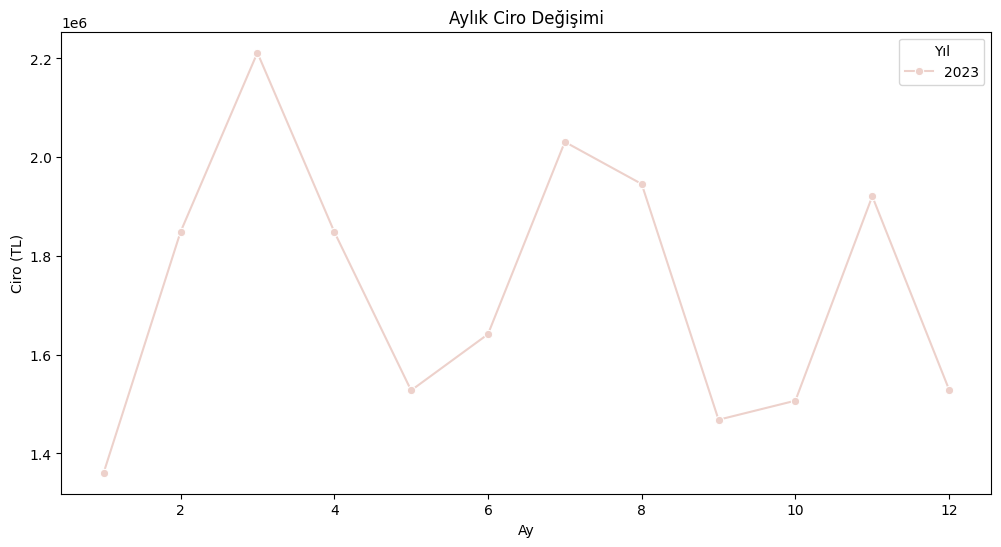

In [5]:
# Yıl ve ay sütunları oluştur
data['Yıl'] = data['Sipariş Alınan Tarih'].dt.year
data['Ay'] = data['Sipariş Alınan Tarih'].dt.month

monthly_revenue = data.groupby(['Yıl', 'Ay'])['Genel Tutar'].sum().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_revenue, x='Ay', y='Genel Tutar', hue='Yıl', marker='o')
plt.title('Aylık Ciro Değişimi')
plt.ylabel('Ciro (TL)')
plt.xlabel('Ay')
plt.show()


<ipython-input-6-dd87a14e6c30>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, y='Ürün Adı', x='Genel Tutar', palette='viridis')


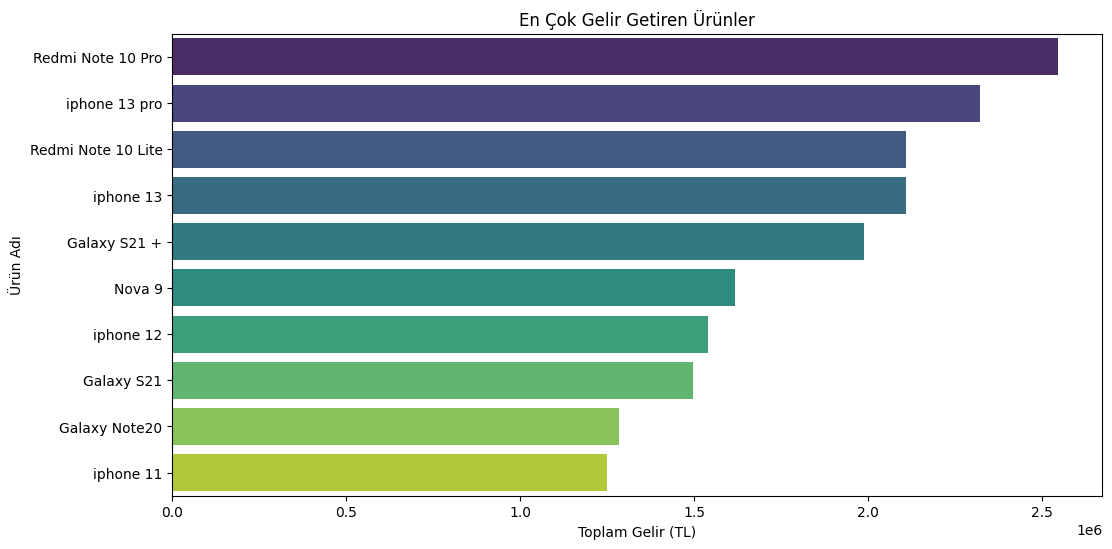

In [6]:
top_products = data.groupby('Ürün Adı')['Genel Tutar'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=top_products, y='Ürün Adı', x='Genel Tutar', palette='viridis')
plt.title('En Çok Gelir Getiren Ürünler')
plt.xlabel('Toplam Gelir (TL)')
plt.ylabel('Ürün Adı')
plt.show()


<ipython-input-7-f89cf9016a9b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='Şehir', y='Genel Tutar', palette='magma')


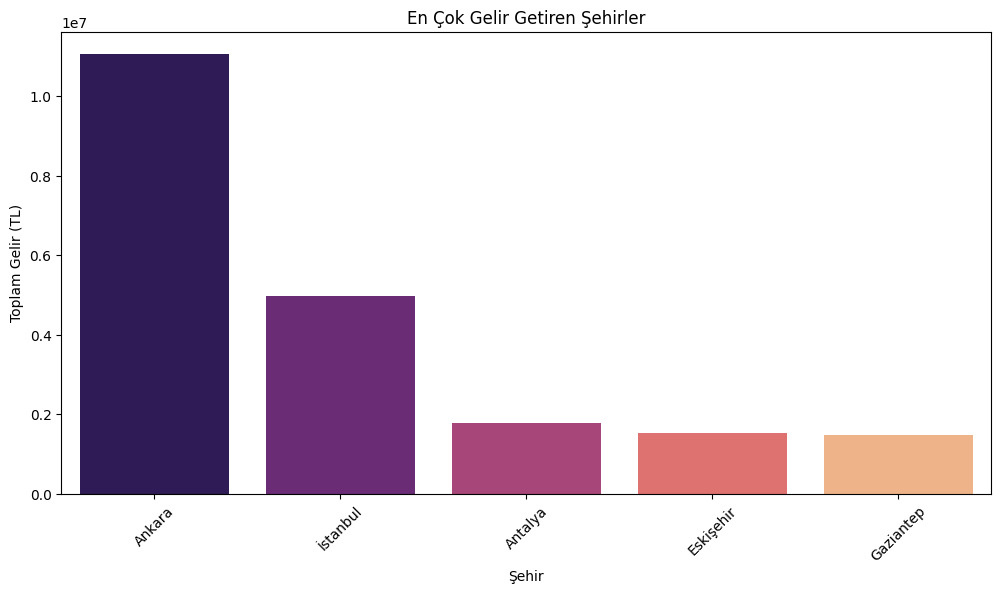

In [7]:
top_cities = data.groupby('Şehir')['Genel Tutar'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=top_cities, x='Şehir', y='Genel Tutar', palette='magma')
plt.title('En Çok Gelir Getiren Şehirler')
plt.ylabel('Toplam Gelir (TL)')
plt.xlabel('Şehir')
plt.xticks(rotation=45)
plt.show()


<ipython-input-8-86fc708c72f5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brand_revenue, x='Marka', y='Genel Tutar', palette='coolwarm')


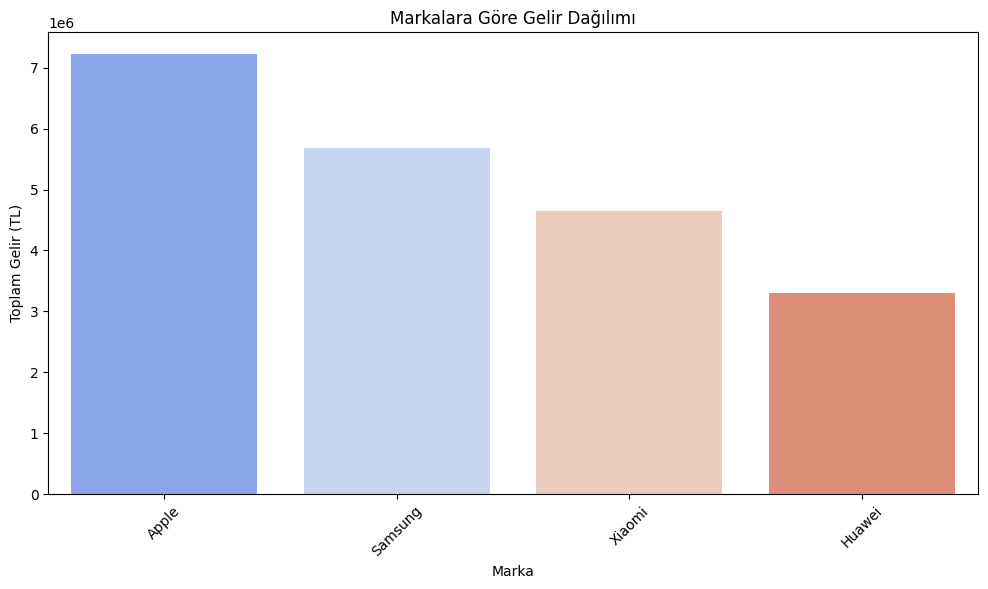

In [8]:
brand_revenue = data.groupby('Marka')['Genel Tutar'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=brand_revenue, x='Marka', y='Genel Tutar', palette='coolwarm')
plt.title('Markalara Göre Gelir Dağılımı')
plt.ylabel('Toplam Gelir (TL)')
plt.xlabel('Marka')
plt.xticks(rotation=45)
plt.show()


In [9]:
customer_avg_spending = data.groupby('Müşteri No')['Genel Tutar'].mean().reset_index().sort_values('Genel Tutar', ascending=False)

print(customer_avg_spending.head(13))


    Müşteri No   Genel Tutar
11        1012  32220.639672
2         1003  30693.642833
5         1006  29023.695968
7         1008  28974.771579
6         1007  28598.916857
3         1004  28234.826984
4         1005  26599.058806
9         1010  26536.780545
0         1001  26361.757241
8         1009  26051.443509
1         1002  25438.846957
10        1011  25364.035139


In [10]:
top_customers = data.groupby(['Müşteri No', 'Müşteri Ad Soyad'])['Genel Tutar'].sum().sort_values(ascending=False).head(10).reset_index()

print(top_customers)


   Müşteri No        Müşteri Ad Soyad  Genel Tutar
0        1008         Nizamettin Uyar   2202082.64
1        1007  Mustafa Gürhan Özdemir   2001924.18
2        1012            Ahmet Yalçın   1965459.02
3        1003            İlknur Akgül   1841618.57
4        1011         Tayfur Taşkıran   1826210.53
5        1006              Ali Baymak   1799469.15
6        1005       Özge Sarıca Darol   1782136.94
7        1004            Mürşit Doğan   1778794.10
8        1001             Feza Gürdal   1528981.92
9        1009          Erhan Demirkol   1484932.28


In [11]:
data['Birim Fiyat'] = data['Genel Tutar'] / data['Adet']
avg_price_per_product = data.groupby('Ürün Adı')['Birim Fiyat'].mean().reset_index().sort_values('Birim Fiyat', ascending=False)

print(avg_price_per_product.head(10))


              Ürün Adı  Birim Fiyat
12       iphone 13 pro     14066.00
3         Galaxy S21 +     13343.40
11           iphone 13     12621.00
10           iphone 12      9800.45
2           Galaxy S21      9659.40
8    Redmi Note 10 Pro      9569.75
4               Nova 9      9235.20
1        Galaxy Note20      8914.60
9            iphone 11      8685.30
7   Redmi Note 10 Lite      8053.50


In [12]:
total_sales = data['Genel Tutar'].sum()
returned_sales = data.loc[data['Durum'].str.contains('İade', case=False, na=False), 'Genel Tutar'].sum()

print(f"Toplam Satış: {total_sales:,.2f} TL")
print(f"İade Edilen Siparişlerin Toplam Tutarı: {returned_sales:,.2f} TL")
print(f"İade Oranı: %{(returned_sales / total_sales * 100):.2f}")


Toplam Satış: 20,841,319.22 TL
İade Edilen Siparişlerin Toplam Tutarı: 3,130,112.77 TL
İade Oranı: %15.02


In [13]:
total_sales = data['Genel Tutar'].sum()
out_of_stock_sales = data.loc[data['Durum'].str.contains('Ürün Stokta Yok', case=False, na=False), 'Genel Tutar'].sum()

print(f"Toplam Satış: {total_sales:,.2f} TL")
print(f"Stokta Olmayan Ürünlerin Toplam Tutarı (Kaçırılan Potansiyel Gelir): {out_of_stock_sales:,.2f} TL")
print(f"Stokta Olmayan Ürünlerin Oranı: %{(out_of_stock_sales / total_sales * 100):.2f}")


Toplam Satış: 20,841,319.22 TL
Stokta Olmayan Ürünlerin Toplam Tutarı (Kaçırılan Potansiyel Gelir): 2,934,730.45 TL
Stokta Olmayan Ürünlerin Oranı: %14.08


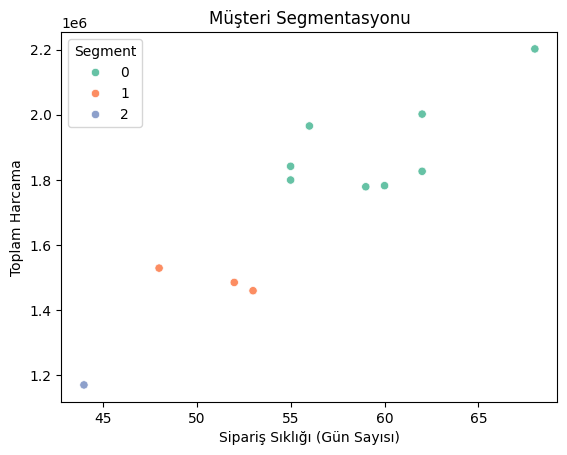

In [14]:
# Öncelikle müşteri bazında toplam harcama ve sipariş sayısı hesapla
customer_summary = data.groupby('Müşteri No').agg({
    'Genel Tutar': 'sum',
    'Sipariş Alınan Tarih': 'nunique'  # Farklı sipariş gün sayısı (sıklık için proxy)
}).rename(columns={'Genel Tutar': 'TotalSpent', 'Sipariş Alınan Tarih': 'OrderFrequency'}).reset_index()

# Segmentasyon için örnek: k-means ile 3 segment oluşturalım
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
customer_summary['Segment'] = kmeans.fit_predict(customer_summary[['TotalSpent', 'OrderFrequency']])

sns.scatterplot(data=customer_summary, x='OrderFrequency', y='TotalSpent', hue='Segment', palette='Set2')
plt.title('Müşteri Segmentasyonu')
plt.xlabel('Sipariş Sıklığı (Gün Sayısı)')
plt.ylabel('Toplam Harcama')
plt.show()


In [17]:
product_profitability = data.groupby('Ürün Adı').agg({
    'Adet': 'sum',
    'Birim Fiyat': 'mean'
}).reset_index()

product_profitability['TotalRevenue'] = product_profitability['Adet'] * product_profitability['Birim Fiyat']
product_profitability = product_profitability.sort_values('TotalRevenue', ascending=False)

print(product_profitability.head(10))


              Ürün Adı  Adet  Birim Fiyat  TotalRevenue
8    Redmi Note 10 Pro   266      9569.75    2545553.50
12       iphone 13 pro   165     14066.00    2320890.00
7   Redmi Note 10 Lite   262      8053.50    2110017.00
11           iphone 13   167     12621.00    2107707.00
3         Galaxy S21 +   149     13343.40    1988166.60
4               Nova 9   175      9235.20    1616160.00
10           iphone 12   157      9800.45    1538670.65
2           Galaxy S21   155      9659.40    1497207.00
1        Galaxy Note20   144      8914.60    1283702.40
9            iphone 11   144      8685.30    1250683.20


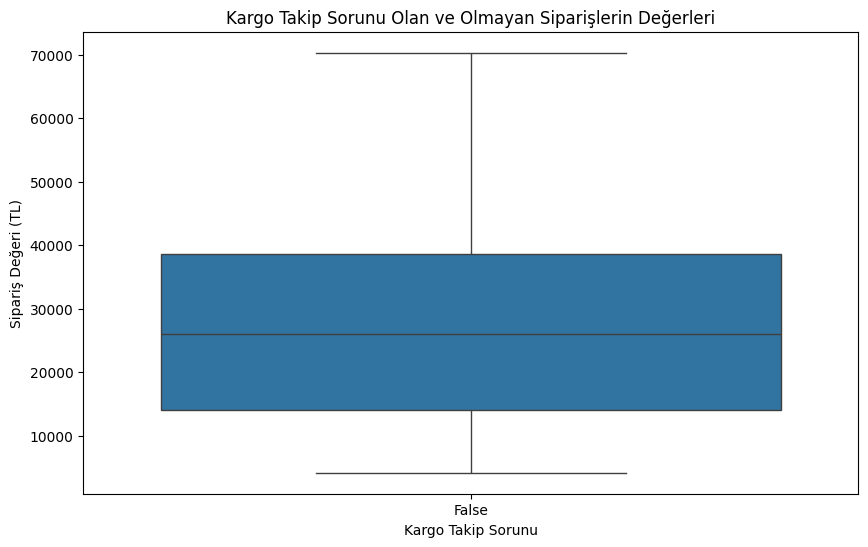

In [18]:
# Kargo Takip No'su sıfır veya eksik olanlar sorunlu kabul edelim
data['Kargo Takip Sorunu'] = data['Kargo Takip No'] == 0

plt.figure(figsize=(10,6))
sns.boxplot(x='Kargo Takip Sorunu', y='Genel Tutar', data=data)
plt.title('Kargo Takip Sorunu Olan ve Olmayan Siparişlerin Değerleri')
plt.xlabel('Kargo Takip Sorunu')
plt.ylabel('Sipariş Değeri (TL)')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


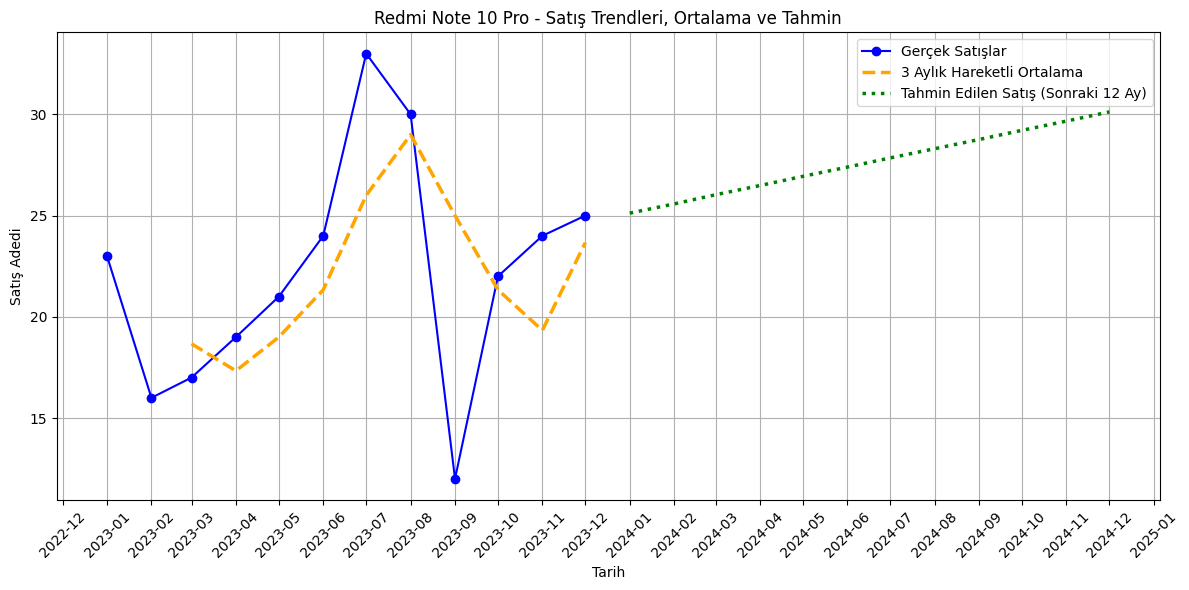

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


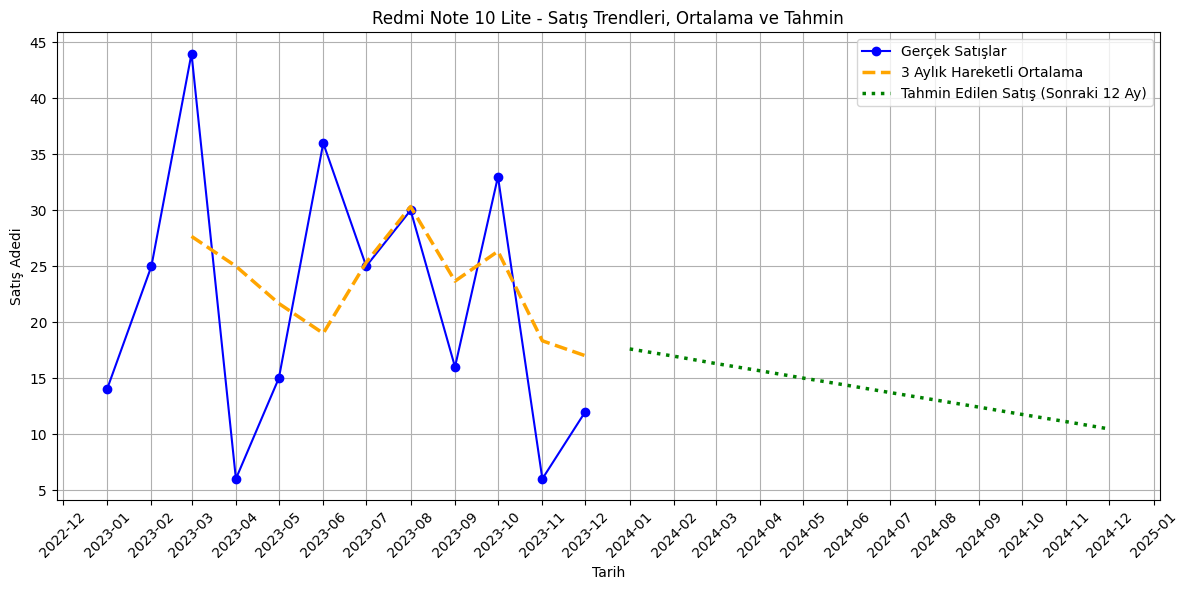

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


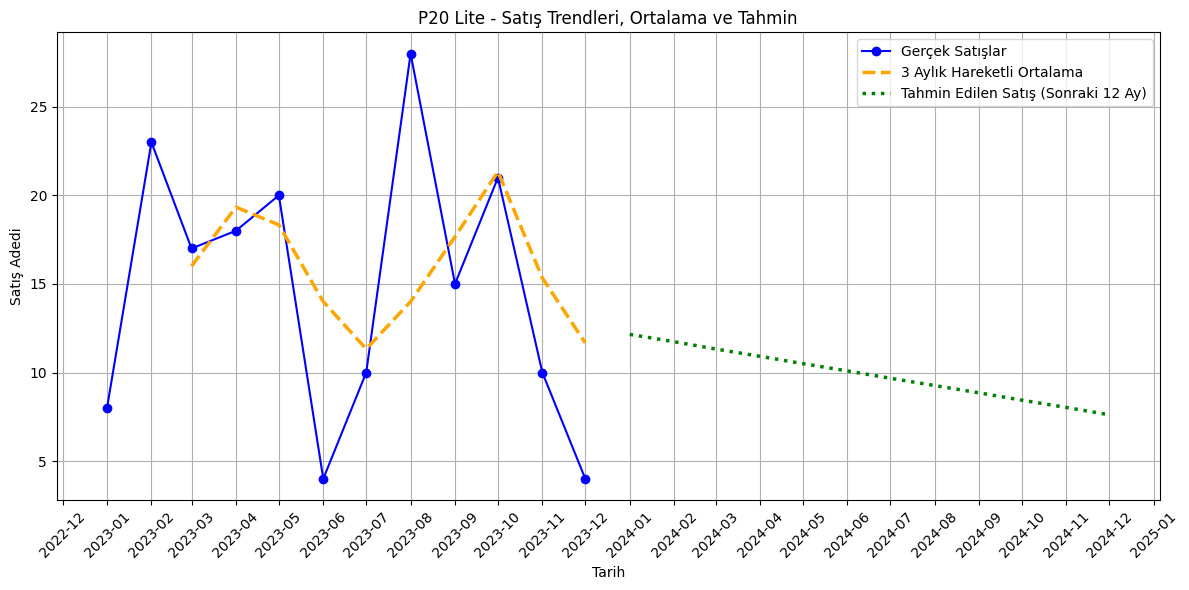

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
import numpy as np

# Veri dosyasını oku
data = pd.read_excel('/Örnek.Veri.xlsx')

# Tarih formatını düzelt
data['Sipariş Alınan Tarih'] = pd.to_datetime(data['Sipariş Alınan Tarih'], dayfirst=True, errors='coerce')

# Yıl ve Ay sütunları
data['Yıl'] = data['Sipariş Alınan Tarih'].dt.year
data['Ay'] = data['Sipariş Alınan Tarih'].dt.month

# En çok satan ilk 3 ürünü bul
top_products = data.groupby('Ürün Adı')['Adet'].sum().sort_values(ascending=False).head(3).reset_index()
top_products_list = top_products['Ürün Adı'].tolist()

# Aylık satış verisi
monthly_product_sales = data.groupby(['Yıl', 'Ay', 'Ürün Adı'])['Adet'].sum().reset_index()

# Tarih sütunu
monthly_product_sales['Tarih'] = pd.to_datetime(
    monthly_product_sales.rename(columns={'Yıl': 'year', 'Ay': 'month'})[['year', 'month']].assign(day=1)
)

# Her ürün için ayrı grafik çiz
for product in top_products_list:
    product_data = monthly_product_sales[monthly_product_sales['Ürün Adı'] == product].copy()
    product_data.sort_values('Tarih', inplace=True)

    # 3 Aylık hareketli ortalama
    product_data['MA_3'] = product_data['Adet'].rolling(window=3).mean()

    # Tarihi sıralı sayıya çevir (regresyon için)
    product_data['Ay_Sayısı'] = np.arange(len(product_data))

    # Regresyon modeli
    X = product_data[['Ay_Sayısı']]
    y = product_data['Adet']

    model = LinearRegression()
    model.fit(X, y)

    # 12 ay sonrası için tahmin verisi oluştur
    future_months = 12
    future_index = np.arange(len(product_data), len(product_data) + future_months)
    future_dates = pd.date_range(start=product_data['Tarih'].max() + pd.DateOffset(months=1), periods=future_months, freq='MS')
    future_preds = model.predict(future_index.reshape(-1, 1))

    # Grafik
    plt.figure(figsize=(12, 6))
    plt.plot(product_data['Tarih'], product_data['Adet'], marker='o', label='Gerçek Satışlar', color='blue')
    plt.plot(product_data['Tarih'], product_data['MA_3'], linestyle='--', linewidth=2.5, label='3 Aylık Hareketli Ortalama', color='orange')
    plt.plot(future_dates, future_preds, linestyle=':', linewidth=2.5, label='Tahmin Edilen Satış (Sonraki 12 Ay)', color='green')

    # Başlık ve etiketler
    plt.title(f"{product} - Satış Trendleri, Ortalama ve Tahmin")
    plt.xlabel("Tarih")
    plt.ylabel("Satış Adedi")
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



In [32]:
pip install prophet statsmodels


INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvrq6by8m/gnkpdk9y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvrq6by8m/9hgxq93n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65267', 'data', 'file=/tmp/tmpvrq6by8m/gnkpdk9y.json', 'init=/tmp/tmpvrq6by8m/9hgxq93n.json', 'output', 'file=/tmp/tmpvrq6by8m/prophet_modelupkymb97/prophet_model-20250519155906.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:59:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:59:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


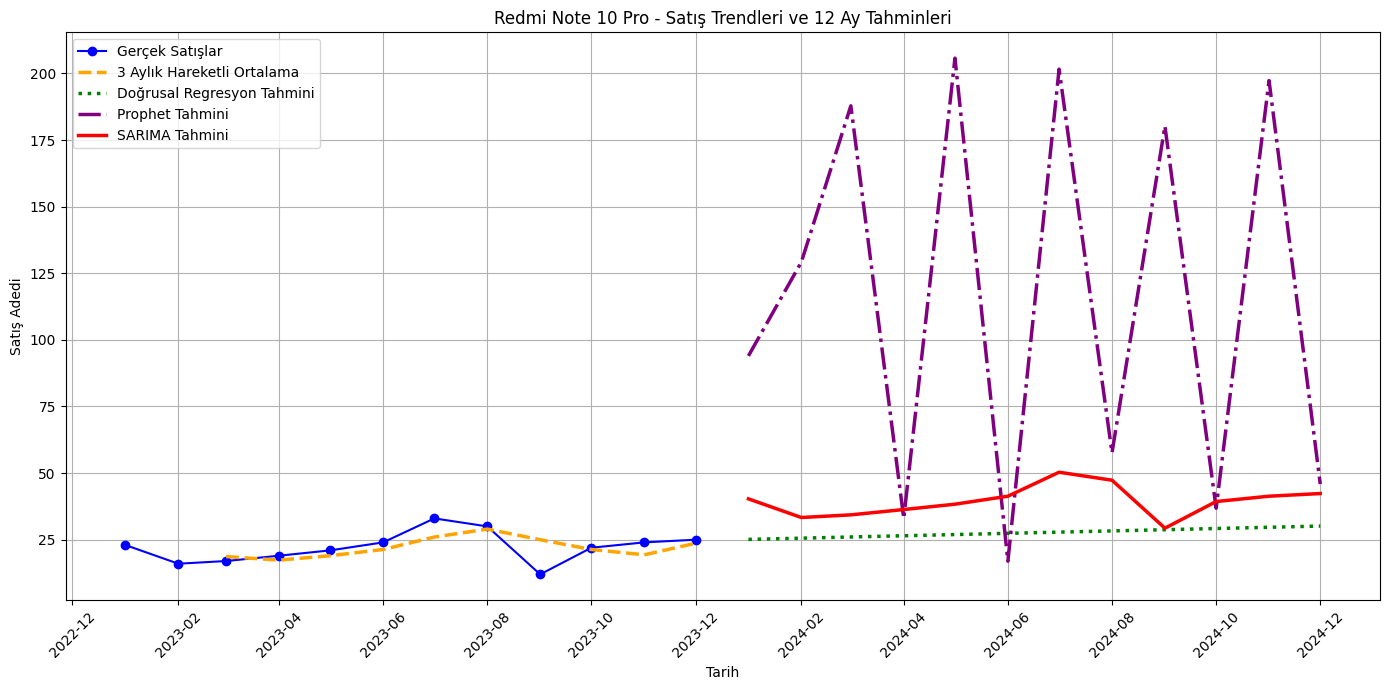

INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvrq6by8m/b486zrxt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvrq6by8m/xzmxrbqk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13063', 'data', 'file=/tmp/tmpvrq6by8m/b486zrxt.json', 'init=/tmp/tmpvrq6by8m/xzmxrbqk.json', 'output', 'file=/tmp/tmpvrq6by8m/prophet_modela15omey0/prophet_model-20250519155919.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:59:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:59:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


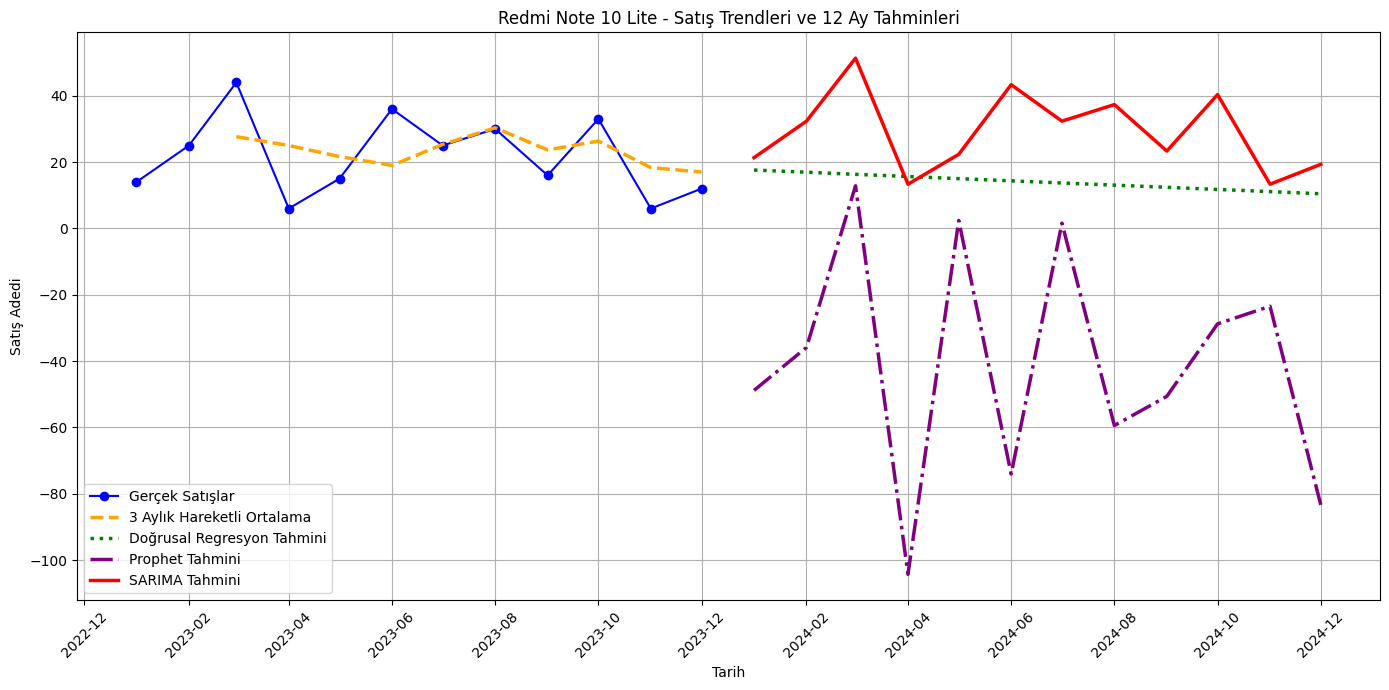

INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvrq6by8m/pbaswez0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvrq6by8m/gv7r_e4i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62791', 'data', 'file=/tmp/tmpvrq6by8m/pbaswez0.json', 'init=/tmp/tmpvrq6by8m/gv7r_e4i.json', 'output', 'file=/tmp/tmpvrq6by8m/prophet_modelvzw4mzke/prophet_model-20250519155920.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:59:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:59:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


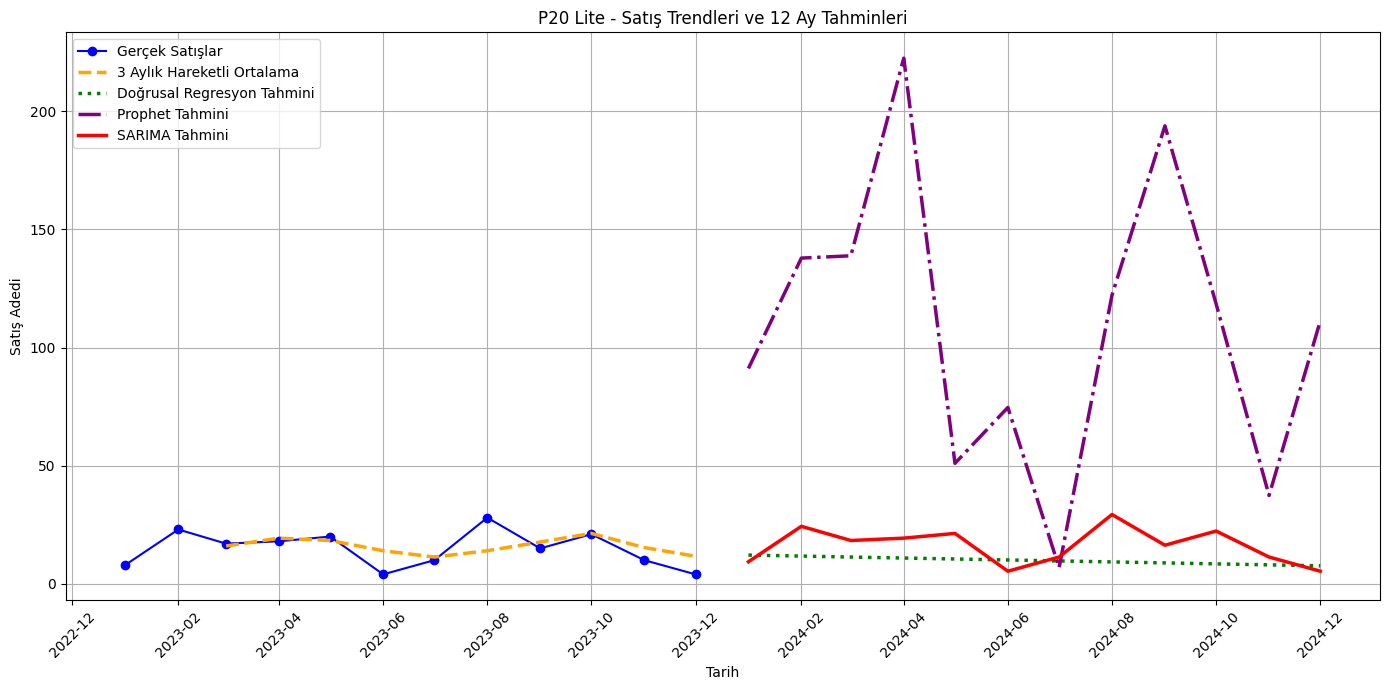

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from sklearn.linear_model import LinearRegression
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

# Veri yükleme ve ön hazırlık
data = pd.read_excel('/Örnek.Veri.xlsx')

data['Sipariş Alınan Tarih'] = pd.to_datetime(data['Sipariş Alınan Tarih'], dayfirst=True, errors='coerce')
data['Yıl'] = data['Sipariş Alınan Tarih'].dt.year
data['Ay'] = data['Sipariş Alınan Tarih'].dt.month

top_products = data.groupby('Ürün Adı')['Adet'].sum().sort_values(ascending=False).head(3).reset_index()
top_products_list = top_products['Ürün Adı'].tolist()

monthly_product_sales = data.groupby(['Yıl', 'Ay', 'Ürün Adı'])['Adet'].sum().reset_index()
monthly_product_sales['Tarih'] = pd.to_datetime(
    monthly_product_sales.rename(columns={'Yıl': 'year', 'Ay': 'month'})[['year', 'month']].assign(day=1)
)

future_months = 12

for product in top_products_list:
    product_data = monthly_product_sales[monthly_product_sales['Ürün Adı'] == product].copy()
    product_data.sort_values('Tarih', inplace=True)

    # 3 aylık hareketli ortalama
    product_data['MA_3'] = product_data['Adet'].rolling(window=3).mean()

    # --- Doğrusal Regresyon Modeli ---
    product_data['Ay_Sayısı'] = np.arange(len(product_data))
    X = product_data[['Ay_Sayısı']]
    y = product_data['Adet']
    lr_model = LinearRegression()
    lr_model.fit(X, y)
    future_index = np.arange(len(product_data), len(product_data) + future_months)
    future_dates = pd.date_range(start=product_data['Tarih'].max() + pd.DateOffset(months=1), periods=future_months, freq='MS')
    future_preds_lr = lr_model.predict(future_index.reshape(-1, 1))

    # --- Prophet Modeli ---
    prophet_df = product_data[['Tarih', 'Adet']].rename(columns={'Tarih':'ds', 'Adet':'y'})
    prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    prophet_model.fit(prophet_df)
    future_prophet = prophet_model.make_future_dataframe(periods=future_months, freq='MS')
    forecast = prophet_model.predict(future_prophet)
    future_preds_prophet = forecast[['ds', 'yhat']].tail(future_months)

    # --- SARIMA Modeli ---
    ts = product_data.set_index('Tarih')['Adet']
    sarima_model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
    sarima_results = sarima_model.fit(disp=False)
    sarima_forecast = sarima_results.get_forecast(steps=future_months)
    sarima_pred_index = pd.date_range(start=ts.index[-1] + pd.DateOffset(months=1), periods=future_months, freq='MS')
    sarima_preds = sarima_forecast.predicted_mean
    sarima_preds.index = sarima_pred_index

    # --- Grafik Çizimi ---
    plt.figure(figsize=(14, 7))
    plt.plot(product_data['Tarih'], product_data['Adet'], marker='o', label='Gerçek Satışlar', color='blue')
    plt.plot(product_data['Tarih'], product_data['MA_3'], linestyle='--', linewidth=2.5, label='3 Aylık Hareketli Ortalama', color='orange')

    plt.plot(future_dates, future_preds_lr, linestyle=':', linewidth=2.5, label='Doğrusal Regresyon Tahmini', color='green')
    plt.plot(future_preds_prophet['ds'], future_preds_prophet['yhat'], linestyle='-.', linewidth=2.5, label='Prophet Tahmini', color='purple')
    plt.plot(sarima_preds.index, sarima_preds.values, linestyle='-', linewidth=2.5, label='SARIMA Tahmini', color='red')

    plt.title(f"{product} - Satış Trendleri ve 12 Ay Tahminleri")
    plt.xlabel("Tarih")
    plt.ylabel("Satış Adedi")
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


<ipython-input-15-f2c8e6ac845b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_price, x='Şehir', y='Birim Fiyat', palette='Spectral')


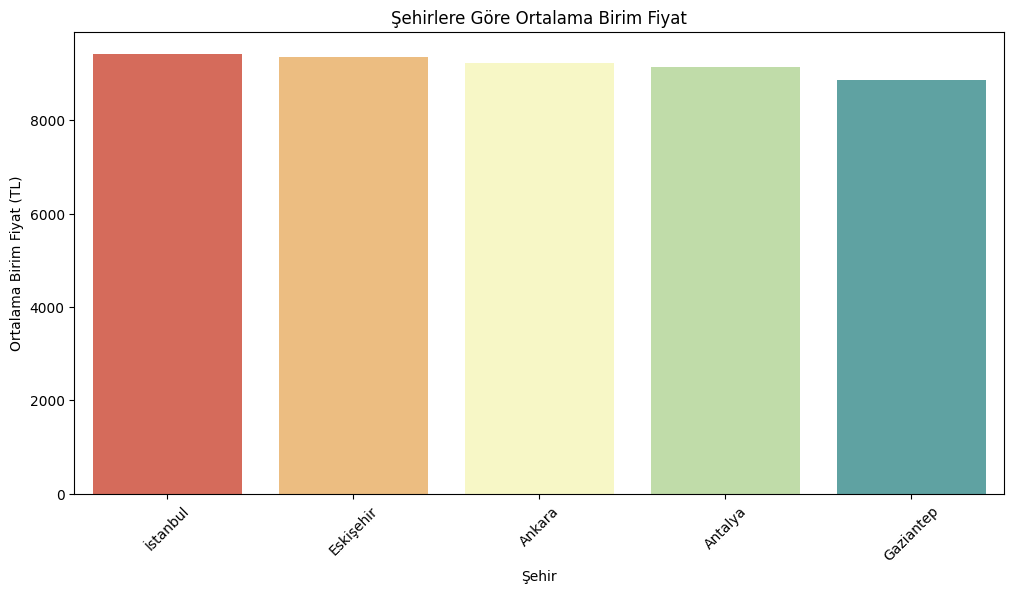

In [ ]:
city_price = data.groupby('Şehir')['Birim Fiyat'].mean().reset_index().sort_values('Birim Fiyat', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=city_price, x='Şehir', y='Birim Fiyat', palette='Spectral')
plt.title('Şehirlere Göre Ortalama Birim Fiyat')
plt.xticks(rotation=45)
plt.ylabel('Ortalama Birim Fiyat (TL)')
plt.xlabel('Şehir')
plt.show()
